In [1]:
#Transfer Learning with Tensorflow

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-09 08:16:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-09 08:16:42 (123 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#import helper functions we're going to use in this notebook

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/just_recombined"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined'.
There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined/Train'.
There are 0 directories and 440 images in '/content/drive/MyDrive/just_recombined/Train/Malignant'.
There are 0 directories and 287 images in '/content/drive/MyDrive/just_recombined/Train/Benign'.
There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined/Test'.
There are 0 directories and 13 images in '/content/drive/MyDrive/just_recombined/Test/Benign'.
There are 0 directories and 30 images in '/content/drive/MyDrive/just_recombined/Test/Malignant'.


In [4]:
train_dir = "/content/drive/MyDrive/just_recombined/Train"
test_dir = "/content/drive/MyDrive/just_recombined/Test"

In [5]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode="binary",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="binary",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 727 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


In [6]:
train_data.class_names

['Benign', 'Malignant']

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os


In [12]:
image_width = 224
image_height = 224
classes = ['Benign', 'Malignant']
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/just_recombined/Train",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/just_recombined/Train",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/just_recombined/Train", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 5000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break

Found 727 images belonging to 2 classes.
Found 287 images belonging to 1 classes.
Found 440 images belonging to 1 classes.


In [13]:
# Load the augmented images for the malignant class
augmented_images = os.listdir("/content/drive/MyDrive/just_recombined/Train/Malignant")

# Count the number of augmented images
num_malignant_images = len(augmented_images)

# Print the number of malignant images
print("Number of malignant images:", num_malignant_images)

Number of malignant images: 5440


In [14]:
augmented_images3 = os.listdir("/content/drive/MyDrive/just_recombined/Train/Benign")

# Count the number of augmented images
num_benign_images = len(augmented_images3)

# Print the number of malignant images
print("Number of benign images:", num_benign_images)

Number of benign images: 5287


In [15]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/just_recombined"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined'.
There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined/Train'.
There are 0 directories and 5440 images in '/content/drive/MyDrive/just_recombined/Train/Malignant'.
There are 0 directories and 5287 images in '/content/drive/MyDrive/just_recombined/Train/Benign'.
There are 2 directories and 0 images in '/content/drive/MyDrive/just_recombined/Test'.
There are 0 directories and 13 images in '/content/drive/MyDrive/just_recombined/Test/Benign'.
There are 0 directories and 30 images in '/content/drive/MyDrive/just_recombined/Test/Malignant'.


In [16]:
train_dir = "/content/drive/MyDrive/just_recombined/Train"
test_dir = "/content/drive/MyDrive/just_recombined/Test"

In [17]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode="binary",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="binary",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 10727 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


In [18]:
train_data.class_names

['Benign', 'Malignant']

In [20]:
# 1.  create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                              experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240509-084437
Epoch 1/40
336/336 [==============================] - 50s 128ms/step - loss: 0.6139 - accuracy: 0.6584 - val_loss: 0.5566 - val_accuracy: 0.6977
Epoch 2/40
336/336 [==============================] - 28s 80ms/step - loss: 0.5671 - accuracy: 0.7021 - val_loss: 0.5482 - val_accuracy: 0.6744
Epoch 3/40
336/336 [==============================] - 28s 81ms/step - loss: 0.5451 - accuracy: 0.7197 - val_loss: 0.5297 - val_accuracy: 0.7674
Epoch 4/40
336/336 [==============================] - 28s 80ms/step - loss: 0.5282 - accuracy: 0.7323 - val_loss: 0.5230 - val_accuracy: 0.7442
Epoch 5/40
336/336 [==============================] - 27s 79ms/step - loss: 0.5161 - accuracy: 0.7455 - val_loss: 0.5234 - val_accuracy: 0.7442
Epoch 6/40
336/336 [==============================] - 27s 79ms/step

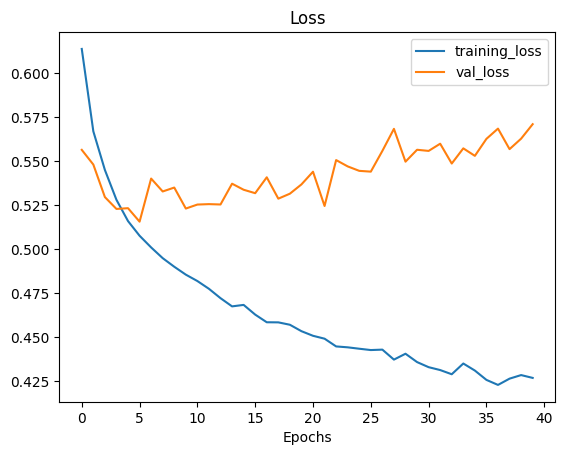

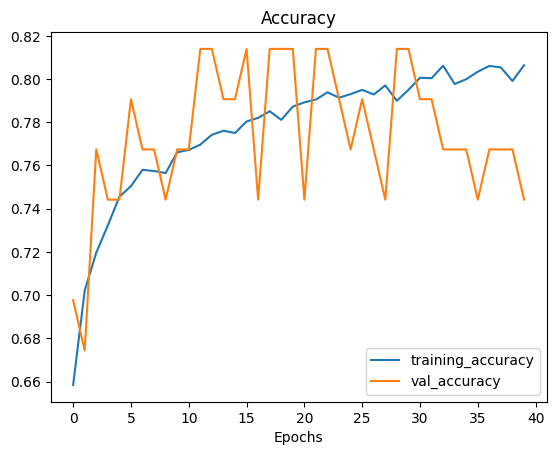

In [21]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow History object.

    Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot loss

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_0)